In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import statsmodels.api as sma
import warnings
warnings.filterwarnings('ignore')

## Reading CSV Files of the dataset

In [4]:
df_cars = pd.read_csv("C:\\Users\\famariyam\\Desktop\\jigsaw handson\\capstone projectt\\Capstone3_UsedCarsData\\csv\\Car_sales_transactions.csv")

In [5]:
df_cars.head()

,Sales_ID,Name,Year,Selling_Price,km_Driven,City_Code,State_Code,Postal_Code,Fuel,Seller_Type,Transmission,Owner,Mileage,Engine,Max_Power,Seats
0,1,Maruti Swift Dzire VDI,2014,450000,145500,CT01,ST15,400001,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,CT28,ST11,834001,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5
2,3,Honda City 2017-2020 EXi,2006,158000,140000,CT12,ST28,201301,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,CT21,ST27,248001,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5
4,5,Maruti Swift VXI BSIII,2007,130000,120000,CT03,ST24,600020,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5


## Information of the entire data frame

In [7]:
df_cars.drop(["Name","City_Code","State_Code","Postal_Code",],axis=1, inplace=True)

In [8]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales_ID       7906 non-null   int64 
 1   Year           7906 non-null   int64 
 2   Selling_Price  7906 non-null   int64 
 3   km_Driven      7906 non-null   int64 
 4   Fuel           7906 non-null   object
 5   Seller_Type    7906 non-null   object
 6   Transmission   7906 non-null   object
 7   Owner          7906 non-null   object
 8   Mileage        7906 non-null   object
 9   Engine         7906 non-null   object
 10  Max_Power      7906 non-null   object
 11  Seats          7906 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 741.3+ KB


## 2.2. 5 Data Transformation

In [9]:
e=df_cars['Mileage'].str.split(" ")
f=[]
for i in range(len(e)):
    f.append(float(e[i][0]))
df_cars.drop("Mileage",axis=1,inplace=True)

In [10]:
df_cars['Mileage_new']=f

In [11]:
a=df_cars['Engine'].str.split(" ")
b=[]
for i in range(len(a)):
    b.append(int(a[i][0]))
b
df_cars.drop("Engine",axis=1,inplace=True)

In [12]:
df_cars['Engine_new']=b

In [13]:
c=df_cars['Max_Power'].str.split(" ")
d=[]
for i in range(len(c)):
    d.append(float(c[i][0]))
df_cars.drop("Max_Power",axis=1,inplace=True)

In [14]:
df_cars['Max_Power_New']=d

In [15]:
df_cars.head()

,Sales_ID,Year,Selling_Price,km_Driven,Fuel,Seller_Type,Transmission,Owner,Seats,Mileage_new,Engine_new,Max_Power_New
0,1,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,23.40,1248,74.00
1,2,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5,21.14,1498,103.52
2,3,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5,17.70,1497,78.00
3,4,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,23.00,1396,90.00
4,5,2007,130000,120000,Petrol,Individual,Manual,First Owner,5,16.10,1298,88.20


               Sales_ID      Year  Selling_Price  km_Driven      Fuel  \
Sales_ID       1.000000 -0.001304      -0.012125   0.009556 -0.034602   
Year          -0.001304  1.000000       0.412302  -0.428548 -0.040414   
Selling_Price -0.012125  0.412302       1.000000  -0.222158 -0.193332   
km_Driven      0.009556 -0.428548      -0.222158   1.000000 -0.270453   
Fuel          -0.034602 -0.040414      -0.193332  -0.270453  1.000000   
Owner          0.007213 -0.472522      -0.224413   0.281945 -0.030725   
Seats         -0.014154 -0.007923       0.041617   0.227259 -0.341640   
Mileage_new    0.028627  0.328544      -0.126280  -0.172980 -0.083432   
Engine_new    -0.011279  0.018263       0.455682   0.206031 -0.486471   
Max_Power_New -0.003717  0.226598       0.749674  -0.038159 -0.282335   

                  Owner     Seats  Mileage_new  Engine_new  Max_Power_New  
Sales_ID       0.007213 -0.014154     0.028627   -0.011279      -0.003717  
Year          -0.472522 -0.007923     0.3285

<AxesSubplot:>

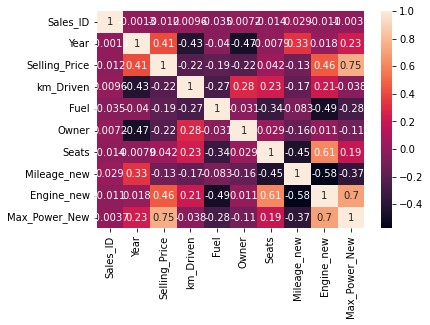

In [16]:
cars=df_cars

cars['Owner']=cars['Owner'].astype('category').cat.codes

cars['Fuel']=cars['Fuel'].astype('category').cat.codes
print(cars.corr())
sns.heatmap(cars.corr(),annot=True)

In [17]:
display(df_cars.describe().round(2))

,Sales_ID,Year,Selling_Price,km_Driven,Fuel,Owner,Seats,Mileage_new,Engine_new,Max_Power_New
count,7906.00,7906.00,7906.00,7906.00,7906.00,7906.00,7906.00,7906.00,7906.00,7906.00
mean,4070.11,2013.98,649813.72,69188.66,1.89,0.79,5.42,19.42,1458.71,91.59
std,2345.77,3.86,813582.75,56792.30,1.00,1.21,0.96,4.04,503.89,35.75
min,1.00,1994.00,29999.00,1.00,0.00,0.00,2.00,0.00,624.00,32.80
25%,2037.25,2012.00,270000.00,35000.00,1.00,0.00,5.00,16.78,1197.00,68.05
50%,4076.50,2015.00,450000.00,60000.00,1.00,0.00,5.00,19.30,1248.00,82.00
75%,6102.00,2017.00,690000.00,95425.00,3.00,2.00,5.00,22.32,1582.00,102.00
max,8128.00,2020.00,10000000.00,2360457.00,3.00,4.00,14.00,42.00,3604.00,400.00


In [18]:
cars.describe(include='object')

,Seller_Type,Transmission
count,7906,7906
unique,3,2
top,Individual,Manual
freq,6563,6865


In [19]:
cars.dropna(axis=1)

,Sales_ID,Year,Selling_Price,km_Driven,Fuel,Seller_Type,Transmission,Owner,Seats,Mileage_new,Engine_new,Max_Power_New
0,1,2014,450000,145500,1,Individual,Manual,0,5,23.40,1248,74.00
1,2,2014,370000,120000,1,Individual,Manual,2,5,21.14,1498,103.52
2,3,2006,158000,140000,3,Individual,Manual,4,5,17.70,1497,78.00
3,4,2010,225000,127000,1,Individual,Manual,0,5,23.00,1396,90.00
4,5,2007,130000,120000,3,Individual,Manual,0,5,16.10,1298,88.20
...,...,...,...,...,...,...,...,...,...,...,...,...
7901,8124,2013,320000,110000,3,Individual,Manual,0,5,18.50,1197,82.85
7902,8125,2007,135000,119000,1,Individual,Manual,1,5,16.80,1493,110.00
7903,8126,2009,382000,120000,1,Individual,Manual,0,5,19.30,1248,73.90
7904,8127,2013,290000,25000,1,Individual,Manual,0,5,23.57,1396,70.00


In [20]:
print("Skewness: %f" %df_cars['Selling_Price'].skew())
print("Kurtosis: %f" %df_cars['Selling_Price'].kurt()) 

Skewness: 4.156864
Kurtosis: 20.634384


In [21]:
cars1 = pd.get_dummies(cars,drop_first=True)
cars1.head()

,Sales_ID,Year,Selling_Price,km_Driven,Fuel,Owner,Seats,Mileage_new,Engine_new,Max_Power_New,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Manual
0,1,2014,450000,145500,1,0,5,23.40,1248,74.00,1,0,1
1,2,2014,370000,120000,1,2,5,21.14,1498,103.52,1,0,1
2,3,2006,158000,140000,3,4,5,17.70,1497,78.00,1,0,1
3,4,2010,225000,127000,1,0,5,23.00,1396,90.00,1,0,1
4,5,2007,130000,120000,3,0,5,16.10,1298,88.20,1,0,1


# 2.2.1. Univariate, Bi- Variate Analysis and Multi- Variate Analysis

## Univariate Analysis

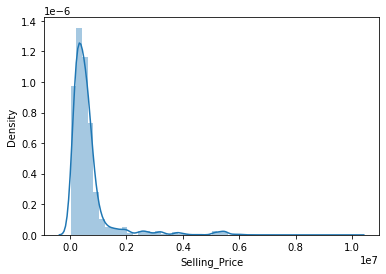

In [22]:
sns_plot = sns.distplot(cars["Selling_Price"])

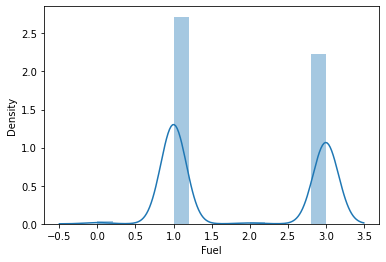

In [23]:
sns_plot = sns.distplot(cars['Fuel'])

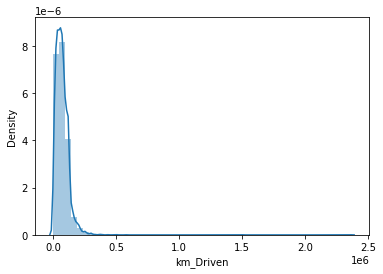

In [24]:
sns_plot = sns.distplot(cars['km_Driven'])

## Bivariate Analysis


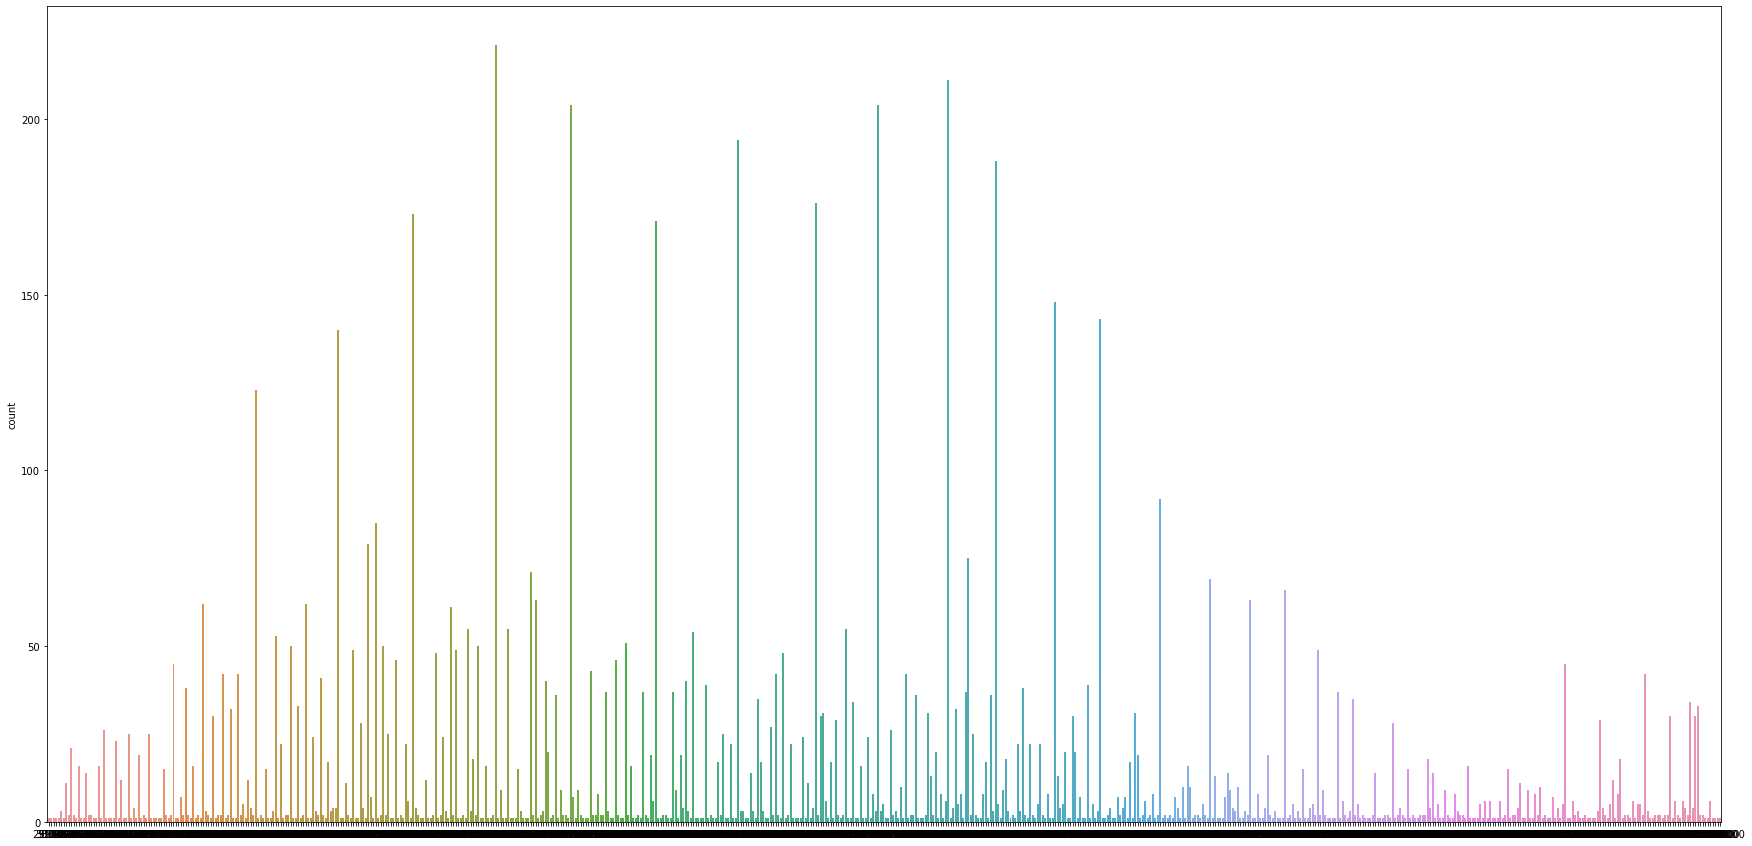

In [25]:
fig, ax = plt.subplots(figsize = (30, 15))  
sns.countplot(x = cars1.Selling_Price.values, data=cars1) 
labels = [item.get_text() for item in ax.get_xticklabels()]

Text(0.5, 1.0, 'Fuel')

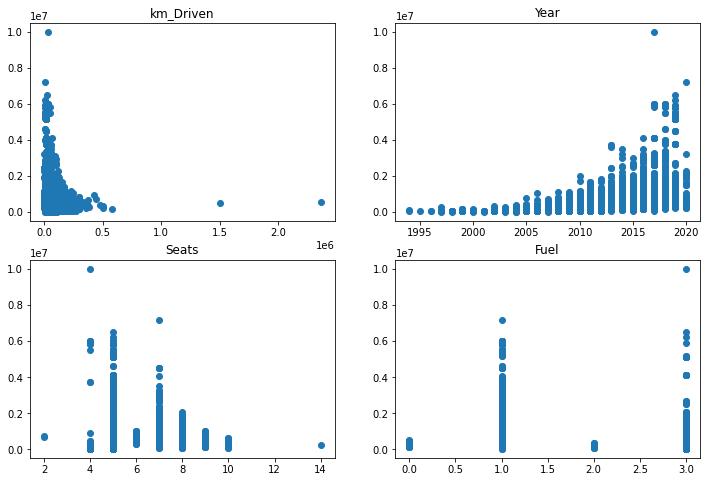

In [26]:
f,axarr = plt.subplots(2,2, figsize=(12,8))
Selling_Priceval = df_cars.Selling_Price.values
axarr[0,0].scatter(df_cars.km_Driven.values,Selling_Priceval )
axarr[0,0].set_title('km_Driven')
axarr[0,1].scatter(df_cars.Year.values, Selling_Priceval)
axarr[0,1].set_title('Year')
axarr[1,0].scatter(df_cars.Seats.values, Selling_Priceval)
axarr[1,0].set_title('Seats')
axarr[1,1].scatter(df_cars.Fuel.values, Selling_Priceval)
axarr[1,1].set_title('Fuel')

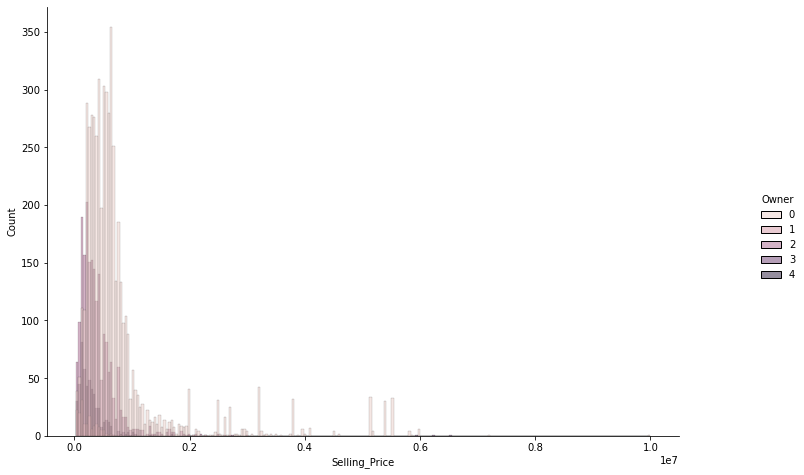

In [27]:
g=sns.displot(df_cars,x="Selling_Price",hue=df_cars["Owner"] )
g.fig.set_figwidth(12)
g.fig.set_figheight(7)

## Multi-Variate Analysis

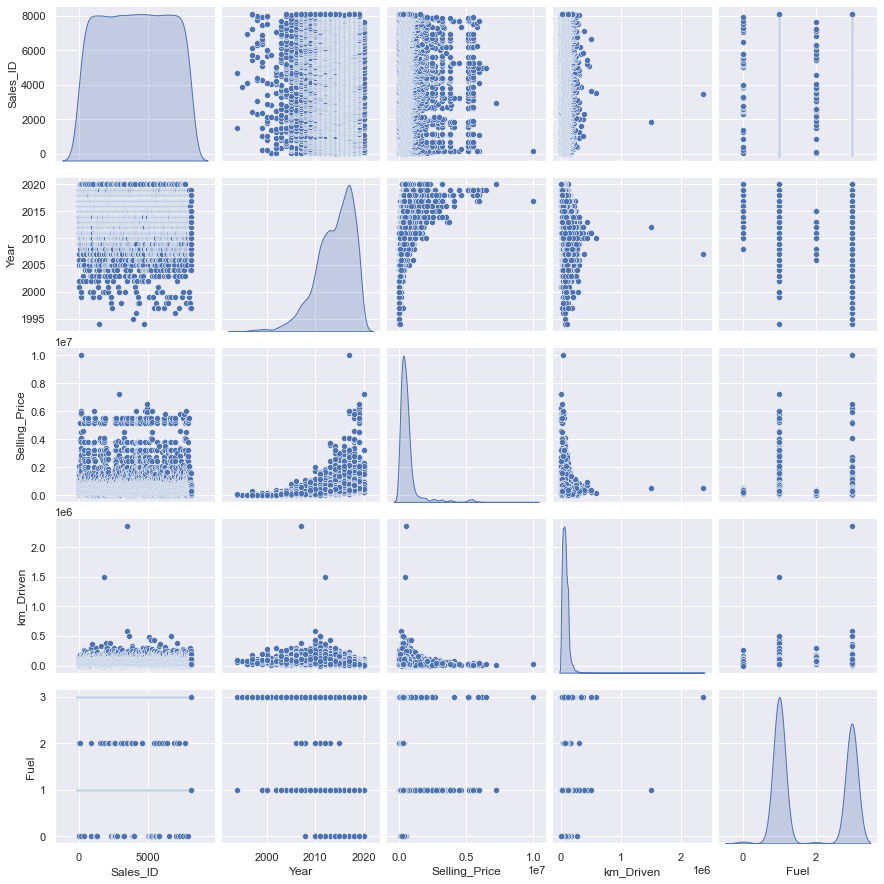

In [28]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df_cars.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')

# 2.2.2)Missing values identification and treatment 

## Determining the Null values

In [29]:
cars.isnull().sum()

Sales_ID         0
Year             0
Selling_Price    0
km_Driven        0
Fuel             0
Seller_Type      0
Transmission     0
Owner            0
Seats            0
Mileage_new      0
Engine_new       0
Max_Power_New    0
dtype: int64

### As there are no NULL values present in the dataset, so there is no need of handling any NULL values

# 2.2.3)Outlier analysis and treatment 

## Finding Outliers

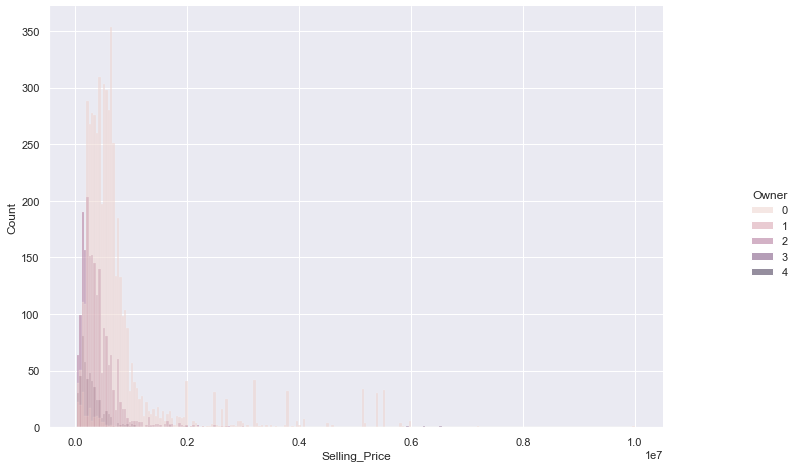

In [30]:
g=sns.displot(df_cars,x="Selling_Price",hue=df_cars["Owner"] )
g.fig.set_figwidth(12)
g.fig.set_figheight(7)

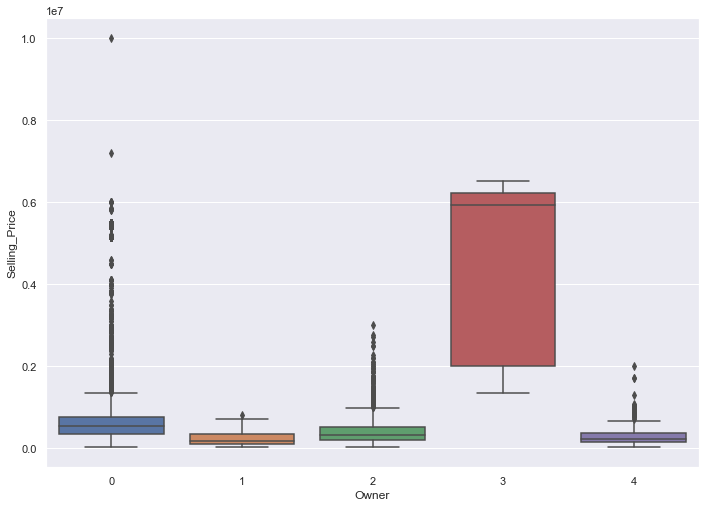

In [31]:
ax = sns.boxplot(x="Owner", y="Selling_Price", data=df_cars)

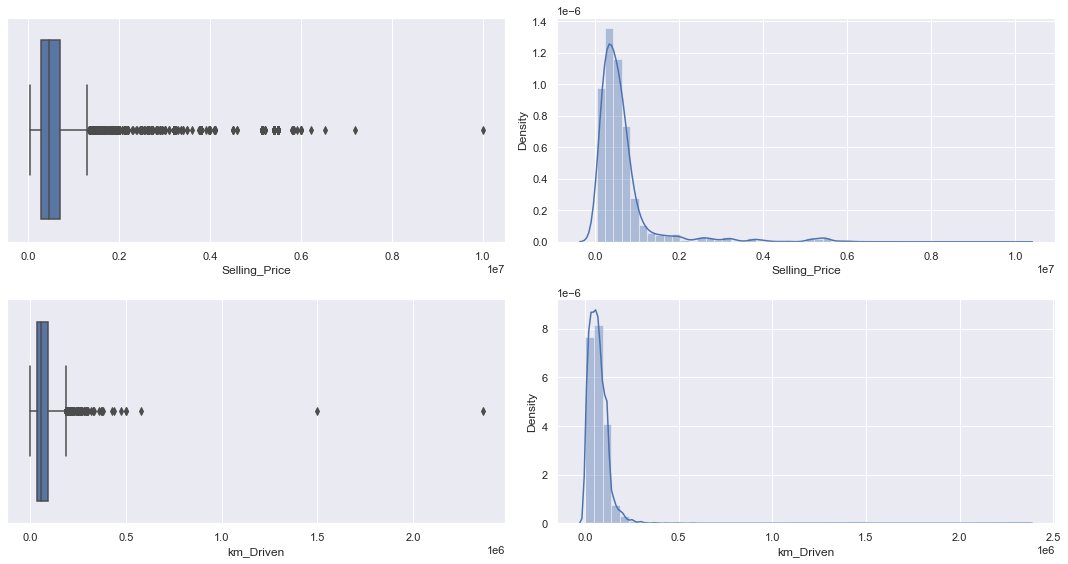

In [32]:
fig, ax = plt.subplots(2, 2, figsize = (15, 8))
sns.boxplot(x= df_cars["Selling_Price"], ax = ax[0,0])
sns.distplot(df_cars['Selling_Price'], ax = ax[0,1])
sns.boxplot(x= df_cars["km_Driven"], ax = ax[1,0])
sns.distplot(df_cars['km_Driven'], ax = ax[1,1])
plt.tight_layout()

In [33]:
df_cars.shape

(7906, 12)

# Removing the Outliers

In [34]:
Q1=df_cars['Selling_Price'].quantile(0.25)
Q3=df_cars['Selling_Price'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

270000.0
690000.0
420000.0
-360000.0 1320000.0


In [35]:
df_cars = df_cars[df_cars['Selling_Price']< Upper_Whisker]

In [36]:
df_cars.shape

(7308, 12)

In [37]:
Q1=df_cars['km_Driven'].quantile(0.25)
Q3=df_cars['km_Driven'].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print(Lower_Whisker, Upper_Whisker)

35000.0
100000.0
65000.0
-62500.0 197500.0


In [38]:
df_cars = df_cars[df_cars['km_Driven']< Upper_Whisker]

In [39]:
df_cars.shape

(7151, 12)

# 2.2.4)Data scaling using min-max and/or  Z-score normalisation 

# Data Scaling

In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [41]:
carminmax = cars1.copy()

In [88]:
cols =['Selling_Price','km_Driven','Fuel','Owner','Year','Seats','Mileage_new','Engine_new','Max_Power_New','Seller_Type_Individual','Seller_Type_Trustmark Dealer','Transmission_Manual']
minmax = MinMaxScaler()
for i in cols:
    carminmax[i] = minmax.fit_transform(carminmax[i].values.reshape(-1,1))
carminmax

,Sales_ID,Year,Selling_Price,km_Driven,Fuel,Owner,Seats,Mileage_new,Engine_new,Max_Power_New,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Manual
0,1,0.769231,0.042126,0.061640,0.333333,0.00,0.25,0.557143,0.209396,0.112200,1.0,0.0,1.0
1,2,0.769231,0.034102,0.050837,0.333333,0.50,0.25,0.503333,0.293289,0.192593,1.0,0.0,1.0
2,3,0.461538,0.012839,0.059310,1.000000,1.00,0.25,0.421429,0.292953,0.123094,1.0,0.0,1.0
3,4,0.615385,0.019559,0.053803,0.333333,0.00,0.25,0.547619,0.259060,0.155773,1.0,0.0,1.0
4,5,0.500000,0.010030,0.050837,1.000000,0.00,0.25,0.383333,0.226174,0.150871,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,8124,0.730769,0.029087,0.046601,1.000000,0.00,0.25,0.440476,0.192282,0.136302,1.0,0.0,1.0
7902,8125,0.500000,0.010532,0.050414,0.333333,0.25,0.25,0.400000,0.291611,0.210240,1.0,0.0,1.0
7903,8126,0.576923,0.035306,0.050837,0.333333,0.00,0.25,0.459524,0.209396,0.111928,1.0,0.0,1.0
7904,8127,0.730769,0.026078,0.010591,0.333333,0.00,0.25,0.561190,0.259060,0.101307,1.0,0.0,1.0


In [89]:
x = carminmax['km_Driven']
y = carminmax['Selling_Price']
x = sma.add_constant(x)
x.head()

,const,km_Driven
0,1.0,0.061640
1,1.0,0.050837
2,1.0,0.059310
3,1.0,0.053803
4,1.0,0.050837


In [90]:
model =sma.OLS(y,x)
model =model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     410.3
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           5.43e-89
Time:                        13:48:35   Log-Likelihood:                 8794.0
No. Observations:                7906   AIC:                        -1.758e+04
Df Residuals:                    7904   BIC:                        -1.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0843      0.001     59.733      0.000       0.081       0.087
km_Driven     -0.7535      0.037    -20.257      0.000      -0.826      -0.681
==============================================================================
Omnibus:                     6708.462   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           163108.932
Skew:                           4.116   Prob(JB):                         0.00
Kurtosis:                      23.673   Cond. No.                         41.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 2.2.6)Feature Engineering

## Distributions of the variables/features.

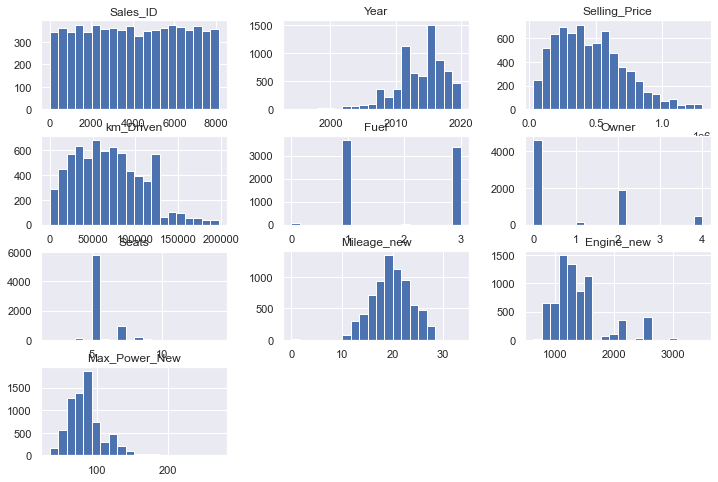

In [91]:
df_cars.hist(figsize=(12,8),bins=20)
plt.show()

## Correlation

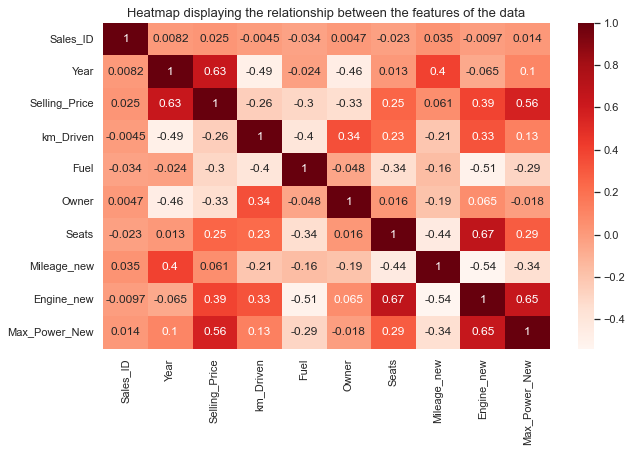

In [92]:
plt.figure(figsize=(10,6))
sns.heatmap(df_cars.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between the features of the data',
         fontsize=13)
plt.show()


# Task 2.4(Model building using ML algorithms)

## 2.4.1) Build an appropriate ML model/s on the data.

### 1.Linear Regression

In [362]:
carminmax

,Sales_ID,Year,Selling_Price,km_Driven,Fuel,Owner,Seats,Mileage_new,Engine_new,Max_Power_New,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Manual
0,1,0.769231,0.042126,0.061640,0.333333,0.00,0.25,0.557143,0.209396,0.112200,1.0,0.0,1.0
1,2,0.769231,0.034102,0.050837,0.333333,0.50,0.25,0.503333,0.293289,0.192593,1.0,0.0,1.0
2,3,0.461538,0.012839,0.059310,1.000000,1.00,0.25,0.421429,0.292953,0.123094,1.0,0.0,1.0
3,4,0.615385,0.019559,0.053803,0.333333,0.00,0.25,0.547619,0.259060,0.155773,1.0,0.0,1.0
4,5,0.500000,0.010030,0.050837,1.000000,0.00,0.25,0.383333,0.226174,0.150871,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,8124,0.730769,0.029087,0.046601,1.000000,0.00,0.25,0.440476,0.192282,0.136302,1.0,0.0,1.0
7902,8125,0.500000,0.010532,0.050414,0.333333,0.25,0.25,0.400000,0.291611,0.210240,1.0,0.0,1.0
7903,8126,0.576923,0.035306,0.050837,0.333333,0.00,0.25,0.459524,0.209396,0.111928,1.0,0.0,1.0
7904,8127,0.730769,0.026078,0.010591,0.333333,0.00,0.25,0.561190,0.259060,0.101307,1.0,0.0,1.0


In [363]:
values_tonot_consider=['Sales_ID','Selling_Price']
X=carminmax.drop(values_tonot_consider,axis=1)
y=carminmax.Selling_Price

In [364]:
X.head()

,Year,km_Driven,Fuel,Owner,Seats,Mileage_new,Engine_new,Max_Power_New,Seller_Type_Individual,Seller_Type_Trustmark Dealer,Transmission_Manual
0,0.769231,0.061640,0.333333,0.0,0.25,0.557143,0.209396,0.112200,1.0,0.0,1.0
1,0.769231,0.050837,0.333333,0.5,0.25,0.503333,0.293289,0.192593,1.0,0.0,1.0
2,0.461538,0.059310,1.000000,1.0,0.25,0.421429,0.292953,0.123094,1.0,0.0,1.0
3,0.615385,0.053803,0.333333,0.0,0.25,0.547619,0.259060,0.155773,1.0,0.0,1.0
4,0.500000,0.050837,1.000000,0.0,0.25,0.383333,0.226174,0.150871,1.0,0.0,1.0


In [365]:
# fit the linear regression and predict the values
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [366]:
# print the intercept and the coefficients of the model
print("Intercept for linear regression model is: ", round(lr.intercept_,3))
print("Coefficients for linear regression model are: ", np.round(lr.coef_,decimals=3))

Intercept for linear regression model is:  -0.021
Coefficients for linear regression model are:  [ 0.087 -0.247 -0.008 -0.003 -0.043  0.048  0.025  0.468 -0.026 -0.036
 -0.046]


In [367]:
# predict the values using liner regression
y_pred = lr.predict(X)

In [368]:
from sklearn.metrics import mean_squared_error, r2_score

In [369]:
# calculate the r2 score of the model
r2_lr=r2_score(y,y_pred)
print("R2 score for the linear regression model is:", r2_lr)

R2 score for the linear regression model is: 0.6797462621703352


In [370]:
#Evaluating Model
#Splitting the dataset in train and test sets

# import the required sklearn module
from sklearn.model_selection import train_test_split

# split the data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(7906, 11)
(5929, 11)
(1977, 11)


In [371]:
# fit the linear regression model on training dataset
lr = LinearRegression()
lr.fit(X_train,y_train)
print("Intercept: ",lr.intercept_)
print("Coefficients: ",lr.coef_)

Intercept:  -0.0110235274578519
Coefficients:  [ 0.07577753 -0.34958582 -0.00946129 -0.00256994 -0.02830575  0.04839937
  0.02091793  0.4660734  -0.02599567 -0.03610344 -0.04638906]


In [372]:
# predict the values from model on test set
y_pred = lr.predict(X_test)

# evaluate the model using R2 score
print("R2 Score: ", r2_score(y_test, y_pred))

R2 Score:  0.6901940555085923


In [373]:
# import the cross validation score method 
from sklearn.model_selection import cross_val_score

# calculate the scores for 10 fold cross validation
scores = cross_val_score(lr,X_train,y_train, cv=10)
scores

array([0.61765154, 0.68514034, 0.66067611, 0.63860436, 0.66777003,
       0.68350333, 0.70203754, 0.70950082, 0.6437295 , 0.65251331])

### There are no hyperparameters for linear regression 

### 2.Decision Tree  regression

In [374]:
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor(max_depth=3,random_state=10)
dt_reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=10)

In [375]:
y_pred = dt_reg.predict(X_test)

In [376]:
y_pred

array([0.02496258, 0.31153379, 0.05809337, ..., 0.05809337, 0.02496258,
       0.05809337])

In [377]:
dt_reg.score(X_test,y_test)

0.8585733521702348

In [378]:
from sklearn import tree

In [379]:
text_representation = tree.export_text(dt_reg)
print(text_representation)

|--- feature_7 <= 0.38
|   |--- feature_7 <= 0.31
|   |   |--- feature_0 <= 0.75
|   |   |   |--- value: [0.02]
|   |   |--- feature_0 >  0.75
|   |   |   |--- value: [0.06]
|   |--- feature_7 >  0.31
|   |   |--- feature_0 <= 0.75
|   |   |   |--- value: [0.08]
|   |   |--- feature_0 >  0.75
|   |   |   |--- value: [0.19]
|--- feature_7 >  0.38
|   |--- feature_0 <= 0.94
|   |   |--- feature_0 <= 0.83
|   |   |   |--- value: [0.14]
|   |   |--- feature_0 >  0.83
|   |   |   |--- value: [0.31]
|   |--- feature_0 >  0.94
|   |   |--- feature_8 <= 0.50
|   |   |   |--- value: [0.54]
|   |   |--- feature_8 >  0.50
|   |   |   |--- value: [0.39]



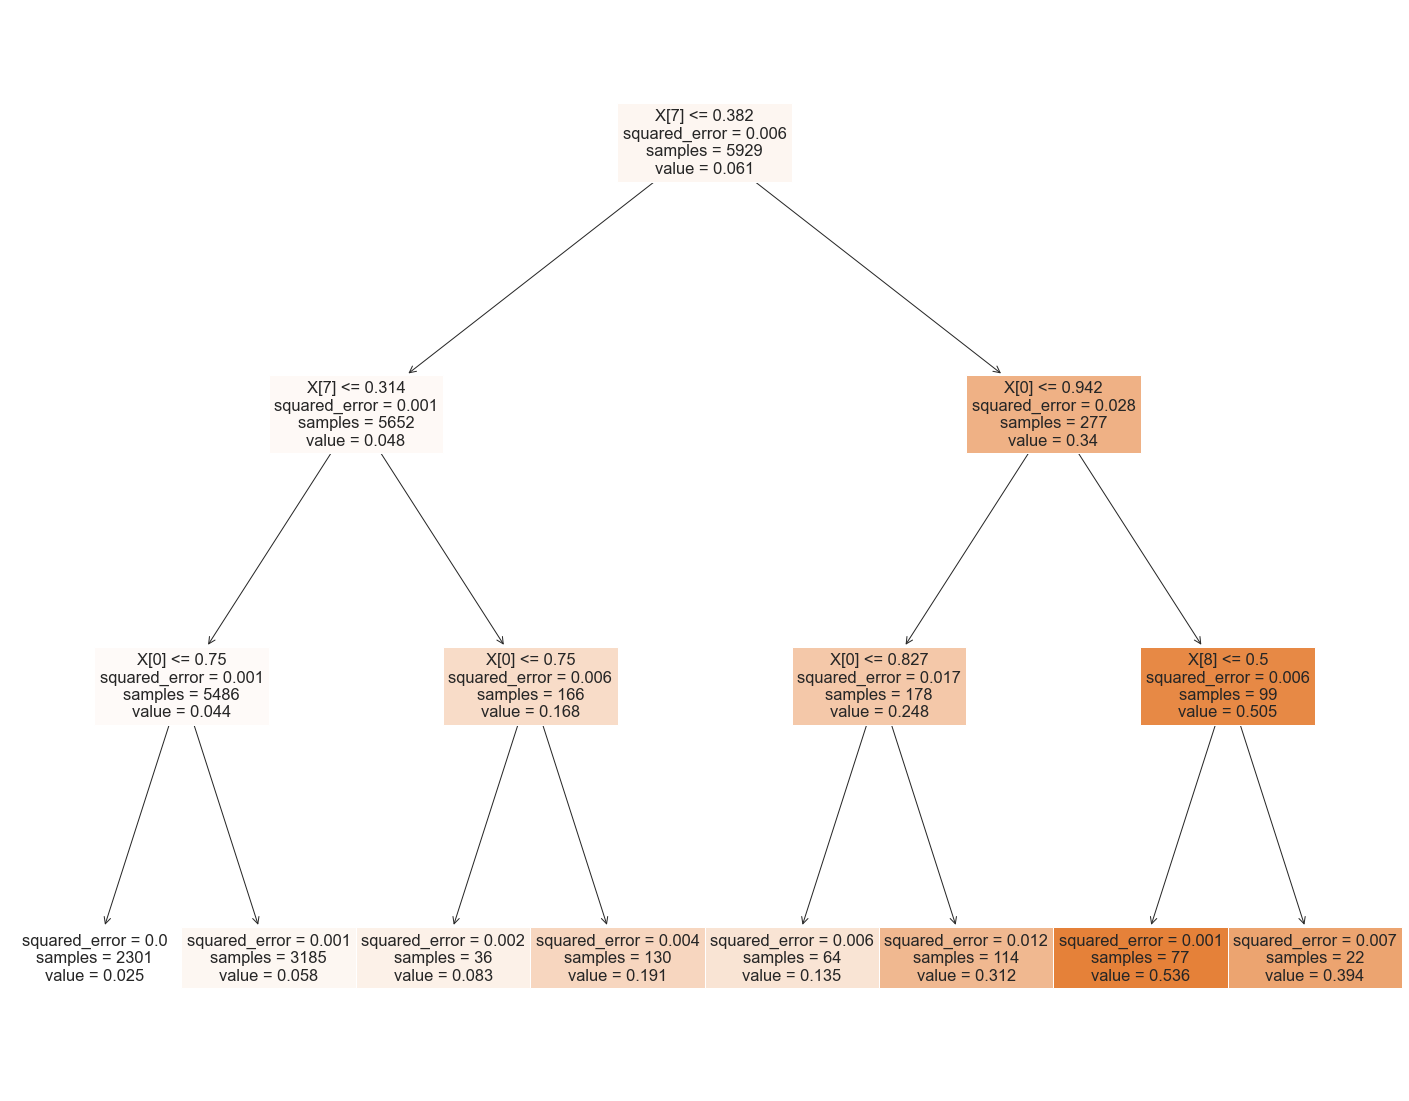

In [380]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_reg,filled=True)

In [381]:
# calculate the r2 score of the model
print("R2 score for the decision tree regression model is:", r2_score(y_test,y_pred))

R2 score for the decision tree regression model is: 0.8585733521702348


In [382]:
# import the cross validation score method 
from sklearn.model_selection import cross_val_score

# calculate the scores for 10 fold cross validation
scores = cross_val_score(dt_reg,X_train,y_train, cv=10)
scores

array([0.89475303, 0.86744736, 0.86838364, 0.8422205 , 0.8659799 ,
       0.81316419, 0.87925817, 0.7938839 , 0.77012526, 0.79975401])

## Changing Hyperparameter

In [383]:
from sklearn.tree import DecisionTreeRegressor
list=[]
for i in range(1,21,1):
    dt_reg2=DecisionTreeRegressor(max_depth=i,random_state=30)
    dt_reg2.fit(X_train,y_train)
    y_pred = dt_reg2.predict(X_test)
    print('for max_depth =',i,'regression score is',dt_reg2.score(X_test,y_test))

for max_depth = 1 regression score is 0.6063376435582681
for max_depth = 2 regression score is 0.764299634654245
for max_depth = 3 regression score is 0.8585733521702347
for max_depth = 4 regression score is 0.9128006694563374
for max_depth = 5 regression score is 0.9198440246203168
for max_depth = 6 regression score is 0.9508644241336651
for max_depth = 7 regression score is 0.9573687169097087
for max_depth = 8 regression score is 0.9596302238047065
for max_depth = 9 regression score is 0.9494557797522344
for max_depth = 10 regression score is 0.9609909408872869
for max_depth = 11 regression score is 0.9606665771267316
for max_depth = 12 regression score is 0.9613770074543141
for max_depth = 13 regression score is 0.9608952551207308
for max_depth = 14 regression score is 0.9575076644431662
for max_depth = 15 regression score is 0.9602305965061316
for max_depth = 16 regression score is 0.9607368714719597
for max_depth = 17 regression score is 0.9640868771053951
for max_depth = 18 regre

In [384]:
from sklearn.tree import DecisionTreeRegressor
list=[]
for i in range(2,11,1):
    dt_reg3=DecisionTreeRegressor(max_depth=6,max_leaf_nodes=i,random_state=20)
    dt_reg3.fit(X_train,y_train)
    y_pred = dt_reg3.predict(X_test)
    print('for max leaf nodes =',i,'regression score is',dt_reg3.score(X_test,y_test))

for max leaf nodes = 2 regression score is 0.6063376435582681
for max leaf nodes = 3 regression score is 0.6933778998148792
for max leaf nodes = 4 regression score is 0.764299634654245
for max leaf nodes = 5 regression score is 0.7952726584480885
for max leaf nodes = 6 regression score is 0.8345664272857063
for max leaf nodes = 7 regression score is 0.8512013103464037
for max leaf nodes = 8 regression score is 0.8762687160587401
for max leaf nodes = 9 regression score is 0.893851352687452
for max leaf nodes = 10 regression score is 0.9002756409432685


In [385]:
dt_reg4=DecisionTreeRegressor(max_depth=10,max_features='auto')
dt_reg4.fit(X_train,y_train)
y_pred = dt_reg4.predict(X_test)
r2_dtr=dt_reg4.score(X_test,y_test)
r2_dtr

0.9503330953662622

#### By changing the max_depth value of regression score varies and we had maximum reg score at max_depth =10
#### By changing the parameter of max_features to auto there is slight increase in the regression score to 0.9509647626281502
#### By changing the max_leaf_nodes value of regression score varies and we had maximum reg score at max_depth =10

### 3.L2-Ridge Regression

In [394]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge()
ridge_reg.fit(train_X,train_y)

Ridge()

In [396]:
r2_ridge=ridge_reg.score(train_X,train_y)
r2_ridge

0.680769054128487

In [388]:
ridge_reg.score(test_X,test_y)
y_pred=reg.predict(test_X)
y_pred

array([0.37813447, 0.51354067, 0.37813447, ..., 0.37813447, 0.37813447,
       0.37813447])

In [389]:
# calculate the r2 score of the model
r2_ridge2=r2_score(test_y,y_pred)
print("R2 score for the ridge regression regression model is:", r2_ridge)

R2 score for the ridge regression regression model is: 0.680769054128487


In [390]:
# import the cross validation score method 
from sklearn.model_selection import cross_val_score

# calculate the scores for 10 fold cross validation
scores = cross_val_score(ridge_reg,X_train,y_train, cv=10)
scores

array([0.61775849, 0.68296322, 0.66179917, 0.63689291, 0.66852378,
       0.68193109, 0.69996749, 0.70282582, 0.65747705, 0.65161614])

## Changing Hyperparameters

In [391]:
from sklearn.linear_model import Ridge
ridge_reg=Ridge()
ridge_reg.fit(train_X,train_y)
ridge_reg=Ridge()

In [274]:
s=['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
for i in s:
    ridge_reg=Ridge(alpha=50,solver=i)   
    ridge_reg.fit(train_X,train_y)
    ridge_reg.score(train_X,train_y)
    print(ridge_reg.score(test_X,test_y))

0.6747733007223229
0.6747733007223196
0.6747733007223229
0.32938863702474475
0.6035540013902376
0.14745131228874797
0.10728064584277464


In [275]:
for i in range(1,51,3):
    ridge_reg=Ridge(alpha=i,solver='cholesky')   
    ridge_reg.fit(train_X,train_y)
    ridge_reg.score(train_X,train_y)
    print(ridge_reg.score(test_X,test_y))

0.675902936479692
0.6758606586957505
0.6758127375325924
0.6757598120574253
0.6757024433375098
0.6756411252325478
0.6755762935211389
0.67550833364432
0.6754375872967957
0.6753643580545655
0.675288916194059
0.6752115028306369
0.6751323334823052
0.6750516011465744
0.6749694789637122
0.6748861225276506
0.6748016718958965


#### By changing the solver we get different values ,and maximum regression value scored by cholesky = 0.6747733007223229
#### By changing the values of alpha we get that values are decreasing on increasing of value of alpha

### 4.OLS Model

In [128]:
import statsmodels.api as sma

#bias term needs to coded separately
x = sma.add_constant(X)

In [129]:
model = sma.OLS(y, x)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     1523.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:12:17   Log-Likelihood:                 13095.
No. Observations:                7906   AIC:                        -2.617e+04
Df Residuals:                    7894   BIC:                        -2.608e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.0215      0.007     -2.942      0.003      -0.036      -0.007
Year                             0.0873      0.005     17.721      0.000       0.078       0.097
km_Driven                       -0.2471      0.026     -9.539      0.000      -0.298      -0.196
Fuel                            -0.0077      0.002     -3.449      0.001      -0.012      -0.003
Owner                           -0.0031      0.002     -1.574      0.116      -0.007       0.001
Seats                           -0.0432      0.010     -4.466      0.000      -0.062      -0.024
Mileage_new                      0.0484      0.009      5.357      0.000       0.031       0.066
Engine_new                       0.0247      0.007      3.458      0.001       0.011       0.039
Max_Power_New                    0.4680      0.010     48.570      0.000       0.449       0.487
Seller_Type_Individual          -0.0256      0.002    -15.399      0.000      -0.029      -0.022
Seller_Type_Trustmark Dealer    -0.0363      0.003    -10.673      0.000      -0.043      -0.030
Transmission_Manual             -0.0464      0.002    -23.333      0.000      -0.050      -0.043
==============================================================================
Omnibus:                     4329.070   Durbin-Watson:                   1.583
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73305.336
Skew:                           2.253   Prob(JB):                         0.00
Kurtosis:                      17.221   Cond. No.                         99.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
X=X.drop('Owner', axis=1)

In [133]:
x = sma.add_constant(X)

In [134]:
model = sma.OLS(y, x)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     1675.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:14:06   Log-Likelihood:                 13094.
No. Observations:                7906   AIC:                        -2.617e+04
Df Residuals:                    7895   BIC:                        -2.609e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -0.0241      0.007     -3.387      0.001      -0.038      -0.010
Year                             0.0898      0.005     19.327      0.000       0.081       0.099
km_Driven                       -0.2502      0.026     -9.684      0.000      -0.301      -0.200
Fuel                            -0.0076      0.002     -3.392      0.001      -0.012      -0.003
Seats                           -0.0430      0.010     -4.440      0.000      -0.062      -0.024
Mileage_new                      0.0488      0.009      5.400      0.000       0.031       0.066
Engine_new                       0.0248      0.007      3.477      0.001       0.011       0.039
Max_Power_New                    0.4679      0.010     48.554      0.000       0.449       0.487
Seller_Type_Individual          -0.0259      0.002    -15.665      0.000      -0.029      -0.023
Seller_Type_Trustmark Dealer    -0.0365      0.003    -10.711      0.000      -0.043      -0.030
Transmission_Manual             -0.0464      0.002    -23.329      0.000      -0.050      -0.043
==============================================================================
Omnibus:                     4319.512   Durbin-Watson:                   1.584
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72757.722
Skew:                           2.248   Prob(JB):                         0.00
Kurtosis:                      17.166   Cond. No.                         98.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### hence the model predicts 68 % of data

In [135]:
model.params

const                          -0.024088
Year                            0.089823
km_Driven                      -0.250193
Fuel                           -0.007594
Seats                          -0.042963
Mileage_new                     0.048767
Engine_new                      0.024825
Max_Power_New                   0.467853
Seller_Type_Individual         -0.025853
Seller_Type_Trustmark Dealer   -0.036451
Transmission_Manual            -0.046402
dtype: float64

In [333]:
r2_ols=0.680

## 2.4.4. To evaluate the performance of the model we use r2 score.

In [397]:
# R2 score
r2score_list = []
r2score_list.append(r2_lr)
r2score_list.append(r2_dtr)
r2score_list.append(r2_ridge)
r2score_list.append(r2_ols)

# Classifier Names
classifier_list = []
classifier_list.append('Linear Regression')
classifier_list.append('Decision Tree Regressor')
classifier_list.append('Ridge Regression')
classifier_list.append('OLS Model')

metrics = np.column_stack((classifier_list,r2score_list))
df_metrics = pd.DataFrame(data=metrics, columns=['Regressors','R2 Score'])
df_metrics

,Regressors,R2 Score
0,Linear Regression,0.6797462621703352
1,Decision Tree Regressor,0.9503330953662622
2,Ridge Regression,0.680769054128487
3,OLS Model,0.68


###  Decision Tree is best technique as the r2 score is maximum.

## 2.4.5 	Identify issues and concerns on the given data and suggest the best technique/s to overcome the issues.outliers
### 

##  Decision Tree is best technique as the regression score and r2 score is maximum as we can use decision tree flexibly and can include complexity of the given data and predict better and meaningful continuous output.
### Compared to other algorithms decision tree regressor requires less effort for data preparation during pre-processing.